# The Hong Kong University of Science and Technology
# MSBD5002: Data Mining and Knowledge Discovery
# Fall 2021 Assignment 4 Question 1

### Student name: Mak Chun Wai, Michael
### HKUST account: cwmakah
### Student ID: 20801333

### Q1. Fuzzy Clustering using EM

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open('./Assignment4-1/EM_Points.txt') as f:
    tmp_lines = f.readlines()
new_lines = []
for line in tmp_lines:
    line = line.replace('\n', '')
    line = list(line.split(" "))
    new_lines.append(line)
# Correct the format
lines = []
for line in new_lines:
    tmp = []
    for number in line:
        tmp.append(float(number))
    lines.append(tmp)

In [3]:
df = pd.DataFrame(columns = ['x', 'y', 'label'])
for point in lines:
    tmp_dict = {'x': point[0], 'y': point[1], 'label': point[2]}
    df = df.append(tmp_dict, ignore_index = True)
df

,x,y,label
0,8.9546,8.3785,0.0
1,9.2420,8.0333,0.0
2,5.0242,13.7540,1.0
3,9.3378,6.7590,0.0
4,6.0299,12.5270,1.0
...,...,...,...
495,4.0719,6.3910,2.0
496,5.6984,14.0840,1.0
497,9.2976,8.5664,0.0
498,5.4358,12.6360,1.0


In [4]:
cluster0 = df.loc[df['label'] == 0]
cluster1 = df.loc[df['label'] == 1]
cluster2 = df.loc[df['label'] == 2]

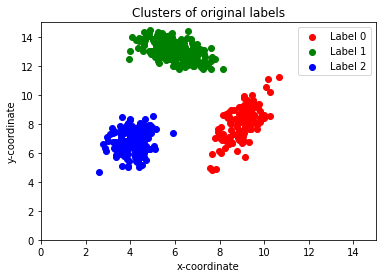

In [5]:
# Plot the original labels
plt.scatter(cluster0.iloc[:, 0], cluster0.iloc[:, 1], color = 'red', label = 'Label 0')
plt.scatter(cluster1.iloc[:, 0], cluster1.iloc[:, 1], color = 'green', label = 'Label 1')
plt.scatter(cluster2.iloc[:, 0], cluster2.iloc[:, 1], color = 'blue', label = 'Label 2')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.title('Clusters of original labels')
plt.legend()
plt.show()

In [6]:
def get_dist(pt1, pt2):
    return (pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2

In [7]:
def productsum(dist1, dist2, dist3):
    return dist1 * dist2 + dist2 * dist3 + dist1 * dist3

In [8]:
# Given that there are 3 clusters
c1 = None
c2 = None
c3 = None
diff = [float('inf'), float('inf'), float('inf')]
iteration = 1
while max(diff) >= 0.0001:
    # Get initial centres for clusters
    if c1 == None:
        c1 = lines[0]
        continue
    elif c2 == None:
        c2 = lines[1]
        continue
    elif c3 == None:
        c3 = lines[2]
        continue
    else:
        # Initialize variables
        M, M_trans, m1, m2, m3 = [], [], [], [], []
        x_c1, y_c1, x_c2, y_c2, x_c3, y_c3, c1_div, c2_div, c3_div = 0, 0, 0, 0, 0, 0, 0, 0, 0
        # Get M
        for point in lines:
            div = productsum(get_dist(point, c1), get_dist(point, c2), get_dist(point, c3))
            w1 = (get_dist(point, c2) * get_dist(point, c3)) / div
            w2 = (get_dist(point, c1) * get_dist(point, c3)) / div
            w3 = (get_dist(point, c1) * get_dist(point, c2)) / div
            M.append([w1, w2, w3])
        # Get transposition of M
        for m in M:
            m1.append(m[0])
            m2.append(m[1])
            m3.append(m[2])
        M_trans.append(m1)
        M_trans.append(m2)
        M_trans.append(m3)
        # Get updated c1, c2, c3
        for i in range(len(lines)):
            x_c1 += lines[i][0] * (M_trans[0][i] ** 2)
            y_c1 += lines[i][1] * (M_trans[0][i] ** 2)
            c1_div += M_trans[0][i] ** 2
            x_c2 += lines[i][0] * (M_trans[1][i] ** 2)
            y_c2 += lines[i][1] * (M_trans[1][i] ** 2)
            c2_div += M_trans[1][i] ** 2
            x_c3 += lines[i][0] * (M_trans[2][i] ** 2)
            y_c3 += lines[i][1] * (M_trans[2][i] ** 2)
            c3_div += M_trans[2][i] ** 2
        # Update the difference
        if max(diff) == float('inf'):
            c1 = [x_c1 / c1_div, y_c1 / c1_div]
            c2 = [x_c2 / c2_div, y_c2 / c2_div]
            c3 = [x_c3 / c3_div, y_c3 / c3_div]
            diff = [1, 1, 1]
        else:
            c1_new = [x_c1 / c1_div, y_c1 / c1_div]
            c2_new = [x_c2 / c2_div, y_c2 / c2_div]
            c3_new = [x_c3 / c3_div, y_c3 / c3_div]
            diff = [get_dist(c1, c1_new), get_dist(c2, c2_new), get_dist(c3, c3_new)]
            c1, c2, c3 = c1_new, c2_new, c3_new
    sse = 0
    for c in [c1, c2, c3]:
        for point in lines:
            sse += get_dist(c, point)
    
    print(f'Iteration {iteration}')
    print(f'Centre 1: {c1}')
    print(f'Centre 2: {c2}')
    print(f'Centre 3: {c3}')
    print(f'SSE: {sse}')
    print('-' * 50)
    iteration += 1

Iteration 1
Centre 1: [6.906485848749611, 7.860207288677903]
Centre 2: [6.998574636133469, 7.486664147873324]
Centre 3: [5.682516508587215, 12.819253187536631]
SSE: 28702.712320464077
--------------------------------------------------
Iteration 2
Centre 1: [6.227172447807674, 7.453787985765078]
Centre 2: [6.338240620927323, 7.287942847937756]
Centre 3: [5.914926304005713, 12.938415574523455]
SSE: 29581.99374608699
--------------------------------------------------
Iteration 3
Centre 1: [5.902163373594692, 7.300968156732735]
Centre 2: [6.172883984409855, 7.270883770790772]
Centre 3: [5.99337647004335, 12.949465157087928]
SSE: 29980.02719128668
--------------------------------------------------
Iteration 4
Centre 1: [5.544253916747068, 7.200603731974289]
Centre 2: [6.420857318674581, 7.3310194398046375]
Centre 3: [6.021765140795767, 12.938696927087312]
SSE: 30224.562868333473
--------------------------------------------------
Iteration 5
Centre 1: [4.841879072281375, 7.050147365206825]
C

In [9]:
new_label = []
best_weight = -1 * float('inf')
for i in range(len(lines)):
    for j in range(3):
        if M_trans[j][i] > best_weight:
            best_weight = M_trans[j][i]
            best_label = j
    new_label.append(best_label)
    best_weight = -1 * float('inf')

In [10]:
df['new_label'] = new_label
df

,x,y,label,new_label
0,8.9546,8.3785,0.0,1
1,9.2420,8.0333,0.0,1
2,5.0242,13.7540,1.0,2
3,9.3378,6.7590,0.0,1
4,6.0299,12.5270,1.0,2
...,...,...,...,...
495,4.0719,6.3910,2.0,0
496,5.6984,14.0840,1.0,2
497,9.2976,8.5664,0.0,1
498,5.4358,12.6360,1.0,2


In [11]:
new_cluster0 = df.loc[df['new_label'] == 0]
new_cluster1 = df.loc[df['new_label'] == 1]
new_cluster2 = df.loc[df['new_label'] == 2]

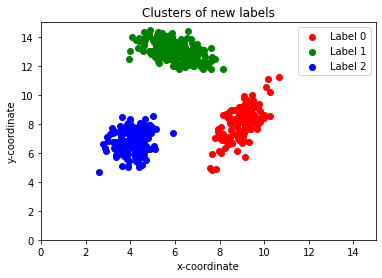

In [12]:
# Plot the new labels
plt.scatter(cluster0.iloc[:, 0], cluster0.iloc[:, 1], color = 'red', label = 'Label 0')
plt.scatter(cluster1.iloc[:, 0], cluster1.iloc[:, 1], color = 'green', label = 'Label 1')
plt.scatter(cluster2.iloc[:, 0], cluster2.iloc[:, 1], color = 'blue', label = 'Label 2')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.title('Clusters of new labels')
plt.legend()
plt.show()